In [1]:
import mlflow

import torch
import torch.nn as nn
from torchinfo import summary
from torchmetrics import Accuracy
from torch.utils.data import Dataset, DataLoader
from VAE.model import VAE
import matplotlib.pyplot as p
from torch.autograd import Variable 
import matplotlib.pyplot as plt
from VAE.data import Ego4d, DEVICE, BATCH_SIZE, transform1, transform2

device cuda is ready


In [2]:
print('transform initializate sucsess')
train_dataset = Ego4d(img_dir='/home/qwest/data_for_ml/1_25/',
                           transform1=transform1,
                           transform2=transform2)
print("train_dataset init")
train_loader = DataLoader(dataset=train_dataset,
                           batch_size=BATCH_SIZE,
                           shuffle=True,
                           num_workers=6)
print("train_loader init")

transform initializate sucsess
train_dataset init
train_loader init


In [3]:
len(train_loader)

9746

In [4]:
loss_fn = nn.CrossEntropyLoss()

In [5]:
mlflow.set_tracking_uri("http://localhost:8080")

In [6]:
mlflow.set_experiment("/VAE-pytorch")

<Experiment: artifact_location='file:///home/qwest/project/PycharmProjects/Reinforsment_Learning/mlruns/693143429450822504', creation_time=1729715917359, experiment_id='693143429450822504', last_update_time=1729715917359, lifecycle_stage='active', name='/VAE-pytorch', tags={}>

In [7]:
from torch import nn, optim 

In [8]:
lr = 0.001
epochs = 70
latent_dim = 128

#model = VAE(latent_dim, batch_size=BATCH_SIZE).to(DEVICE)
#model = torch.load(f"/home/qwest/project/PycharmProjects/Reinforsment_Learning/VAE/weights/loss_1393/VAE_6.pt", weights_only=False)
#optimizer = optim.Adam(model.parameters(), lr=lr)

In [9]:
model = VAE(latent_dim, batch_size=BATCH_SIZE).to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=lr)

checkpoint = torch.load('/home/qwest/project/PycharmProjects/Reinforsment_Learning/test_W/VAE_checkpoint_12810.pt')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

/tmp/ipykernel_5081/3451908458.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('/home/qwest/project/PycharmProjects/Reinforsment_Learning/test_W/

In [10]:
loss

tensor(0.5204, device='cuda:0', requires_grad=True)

In [10]:
def train(epoch):
    #for epoch in range(1, epochs+1):
    x = next(iter(train_loader))
    model.train()
    print(f'Epoch {epoch} start')
    eval_loss = 0
    for _, data in enumerate(train_loader):
            data = data.to(DEVICE)
            optimizer.zero_grad()
            
            recon_batch, mu, logvar = model(data)
            loss = model.loss_function(recon_batch, data, mu, logvar)
            eval_loss += loss
            loss.backward()
            optimizer.step()

    torch.save({
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss':loss,
                'epoch':epoch,
                'full_model':model
                },
                f'VAE/weights/main/VAE_checkpoint_{latent_dim}_{epoch}.pt')
    
    model.eval()
    mlflow.log_metric("total_loss", f"{loss:2f}", step=epoch)
    print(f"Avg loss: {loss:2f} \n")
    recon_img, _, _ = model(x[:1].to(DEVICE))
    img = recon_img.view(3, 64, 64).detach().cpu().numpy().transpose(1, 2, 0)
    f = p.imshow(img)
    p.show()
    #recon_img, _, _ = model(x[:1].to(DEVICE))
    #img = recon_img.view(3, 64, 64).detach().cpu().numpy().transpose(1, 2, 0)

        #torch.save(train_loader, f'train_loadet_{epochs}.pt')



In [10]:
#plt.imshow(model(torch.tensor(input)[:1].to(DEVICE))[0][0].view(3, 64, 64).detach().cpu().numpy().transpose(1, 2, 0))

In [12]:
# signature = mlflow.models.infer_signature(
#     input,
#     model(torch.tensor(input)[:1].to(DEVICE))[0][0].view(3, 64, 64).detach().cpu().numpy().transpose(1, 2, 0),
# )

In [223]:
# def evaluation(dataloader, model, loss_fn, epochs):
#     num_batches = len(dataloader)
#     model.eval()
#     eval_loss = 0.0
#     with torch.no_grad():
#         for X in dataloader:
#             Y = model(torch.tensor(X)[:1].to(DEVICE))[0][0].view(3, 64, 64).detach().cpu().numpy()
#             eval_loss += loss_fn(torch.tensor(Y), torch.tensor(X[0])).item()
#     eval_loss /= num_batches
#     mlflow.log_metric("eval_loss", f"{eval_loss:2f}", step=epochs)
#     print(f"Avg loss: {eval_loss:2f} \n")

Epoch 11 start
Avg loss: 0.557310 



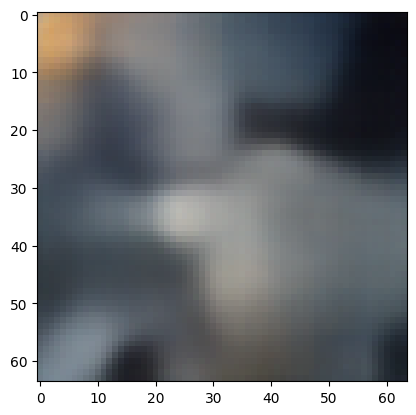

Epoch 12 start
Avg loss: 0.547631 



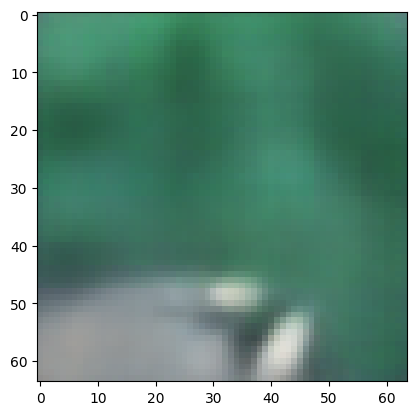

Epoch 13 start
Avg loss: 0.552552 



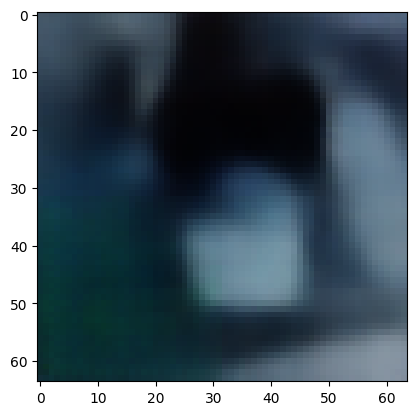

Epoch 14 start
Avg loss: 0.535769 



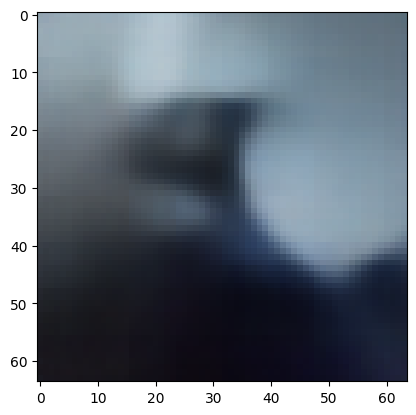

Epoch 15 start
Avg loss: 0.519713 



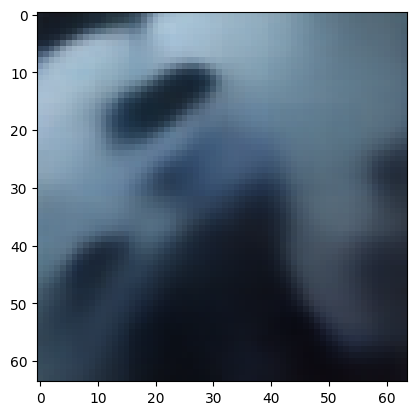

Epoch 16 start
Avg loss: 0.537985 



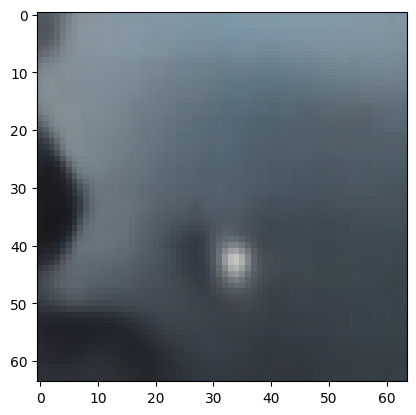

Epoch 17 start
Avg loss: 0.556473 



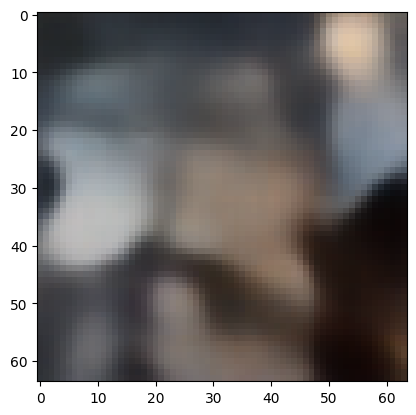

Epoch 18 start
Avg loss: 0.536052 



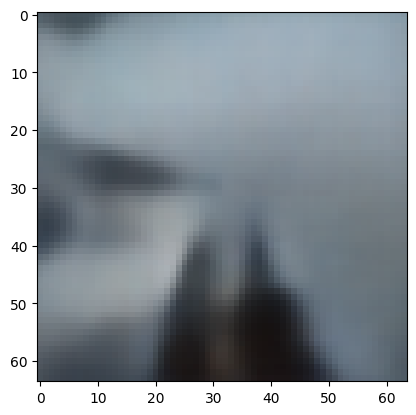

Epoch 19 start
Avg loss: 0.556535 



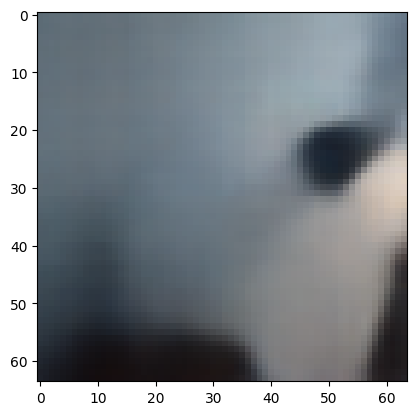

Epoch 20 start
Avg loss: 0.558555 



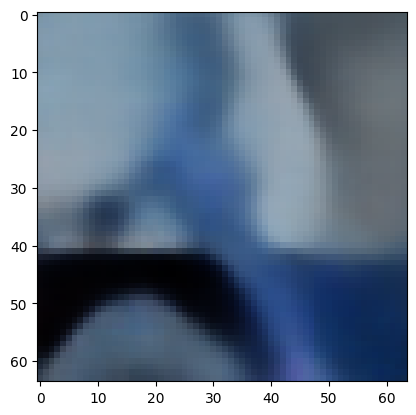

Epoch 21 start
Avg loss: 0.556562 



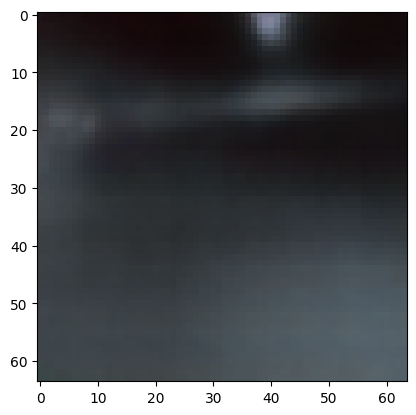

Epoch 22 start
Avg loss: 0.559162 



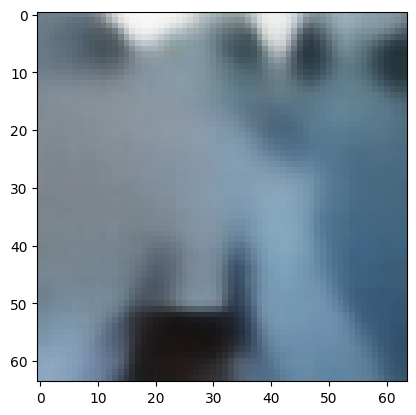

Epoch 23 start
Avg loss: 0.572943 



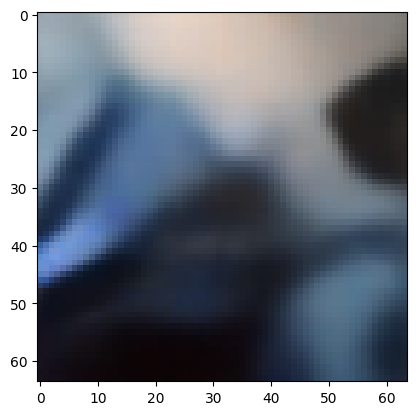

Epoch 24 start


2024/11/01 09:50:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run beautiful-slug-110 at: http://localhost:8080/#/experiments/693143429450822504/runs/4b4bc33985074709b5793f727b317ffe.
2024/11/01 09:50:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:8080/#/experiments/693143429450822504.


KeyboardInterrupt: 

In [11]:
with mlflow.start_run() as run:
    params = {
        "epochs": epochs,
        "learning_rate": lr,
        "batch_size": BATCH_SIZE,
        #"loss_function": loss_fn.__class__.__name__,
        "metric_function": "BCE",
        "optimizer": "Adam",
    }
    # Log training parameters.
    mlflow.log_params(params)

    # Log model summary.|
    with open("model_summary.txt", "w") as f:
        f.write(str(summary(model)))
    mlflow.log_artifact("model_summary.txt")

    for t in range(11, epochs+1):
        train(t)
        #torch.save(model, f'VAE{t}.pt')
        #train(train_dataloader, model, loss_fn, metric_fn, optimizer, epoch=t)
        #evaluation(train_loader, model, loss_fn, epochs=t)

    # Save the trained model to MLflow.
    mlflow.pytorch.log_model(model, "model")#, signature=signature)
    

In [110]:
model = VAE(128, batch_size=BATCH_SIZE).to(DEVICE)

In [12]:
# checkpoint = torch.load('/home/qwest/project/PycharmProjects/Reinforsment_Learning/test_W/VAE_checkpoint_1283.pt')
# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# epoch = checkpoint['epoch']
# loss = checkpoint['loss']
model.eval()

VAE(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2), bias=False)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2), bias=False)
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.2, inplace=True)
    (7): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2), bias=False)
    (8): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): LeakyReLU(negative_slope=0.2, inplace=True)
    (10): Conv2d(512, 256, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
    (11): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(128, 512, kernel_size=(4, 4)

In [17]:
print('transform initializate sucsess')
train_dataset = Ego4d(img_dir='/home/qwest/data_for_ml/ROBO/',
                           transform1=transform1,
                           transform2=transform2)
print("train_dataset init")
train_loader = DataLoader(dataset=train_dataset,
                           batch_size=BATCH_SIZE,
                           shuffle=True,
                           num_workers=6)
print("train_loader init")

transform initializate sucsess
train_dataset init
train_loader init


torch.Size([32, 3, 64, 64])


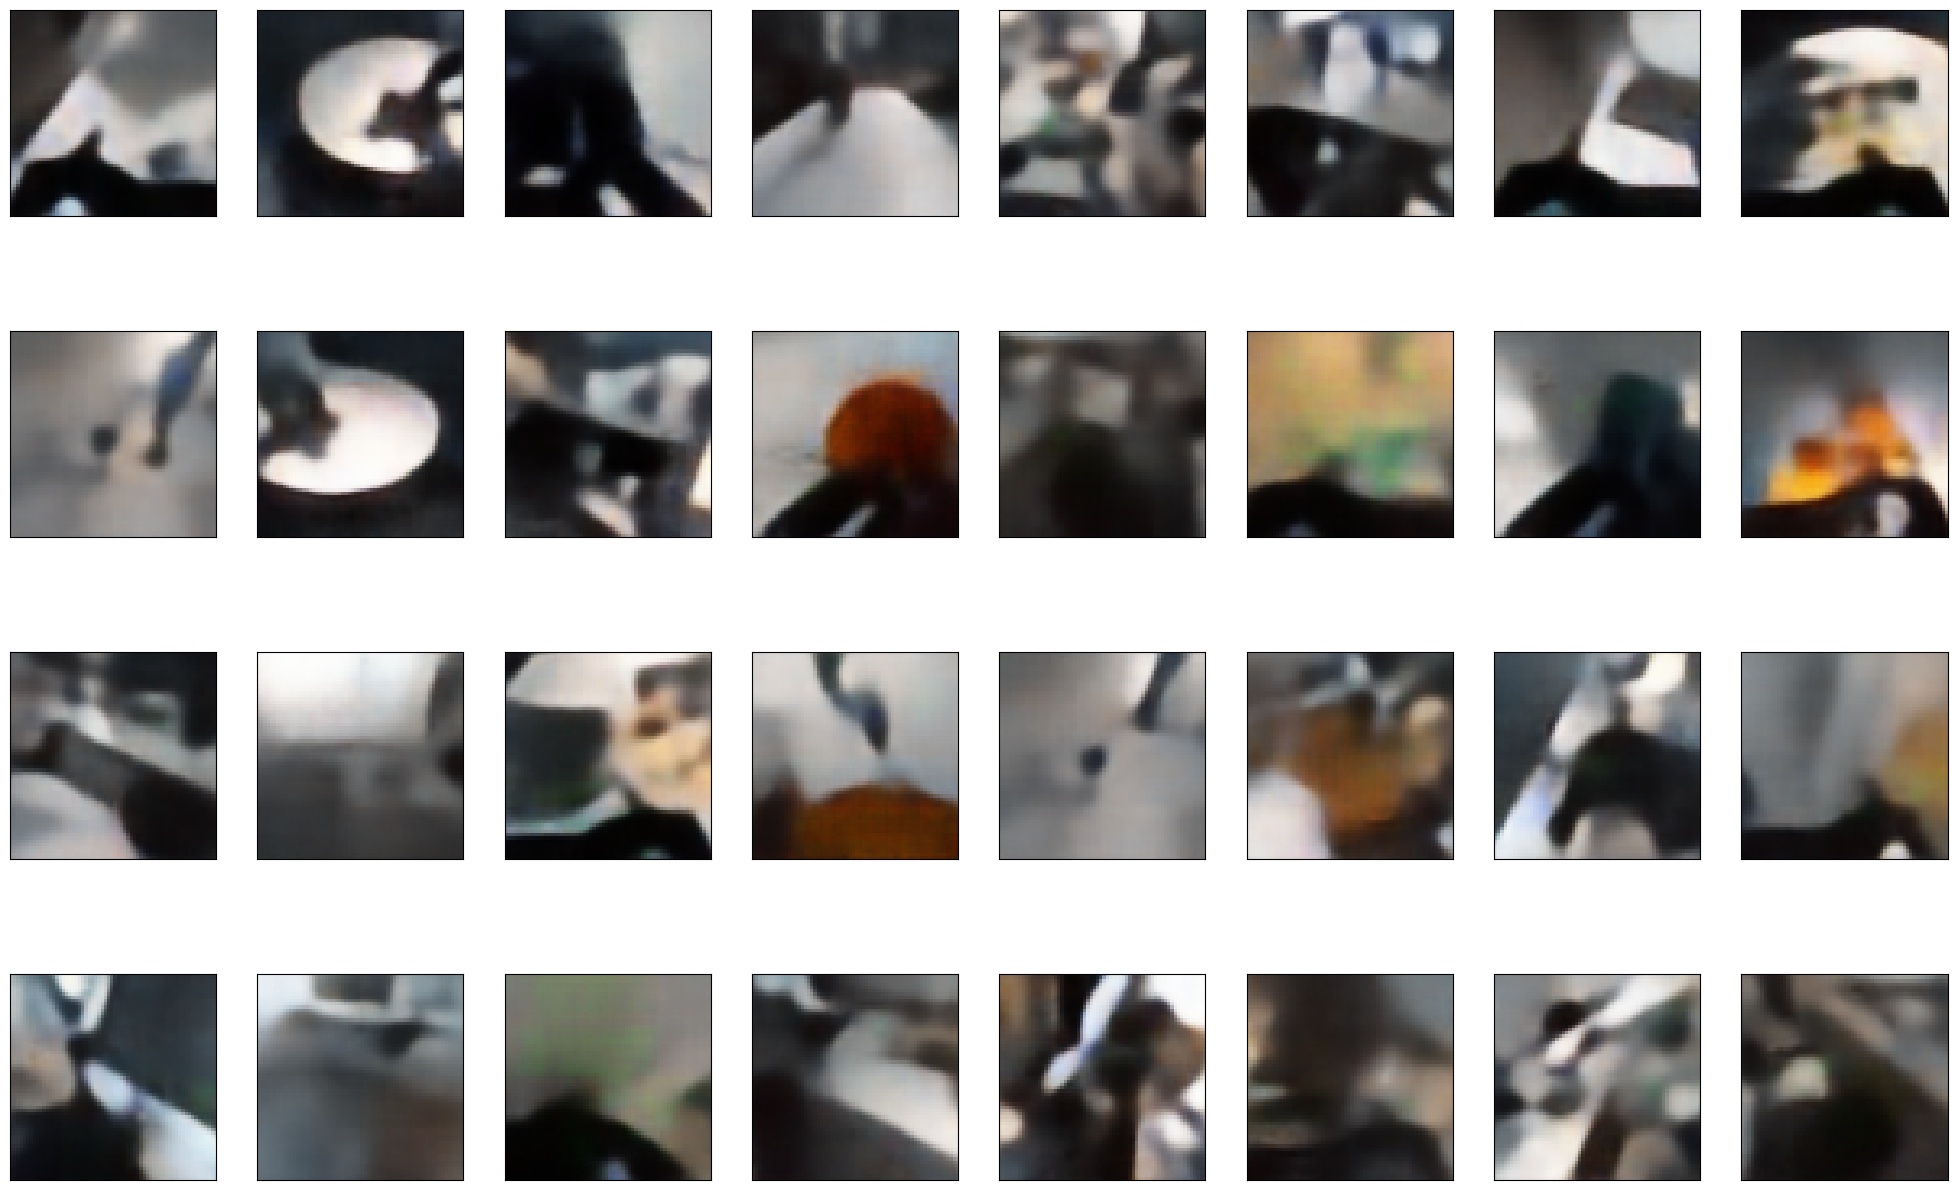

In [18]:
x = next(iter(train_loader))
print(x.size())
reconstructed, mu, _ = model(x.to(DEVICE))
reconstructed = reconstructed.view(-1, 3, 64, 64).detach().cpu().numpy().transpose(0, 2, 3, 1)

fig = plt.figure(figsize=(25, 16))
for ii, img in enumerate(reconstructed):
    ax = fig.add_subplot(4, 8, ii + 1, xticks=[], yticks=[])
    plt.imshow((img))

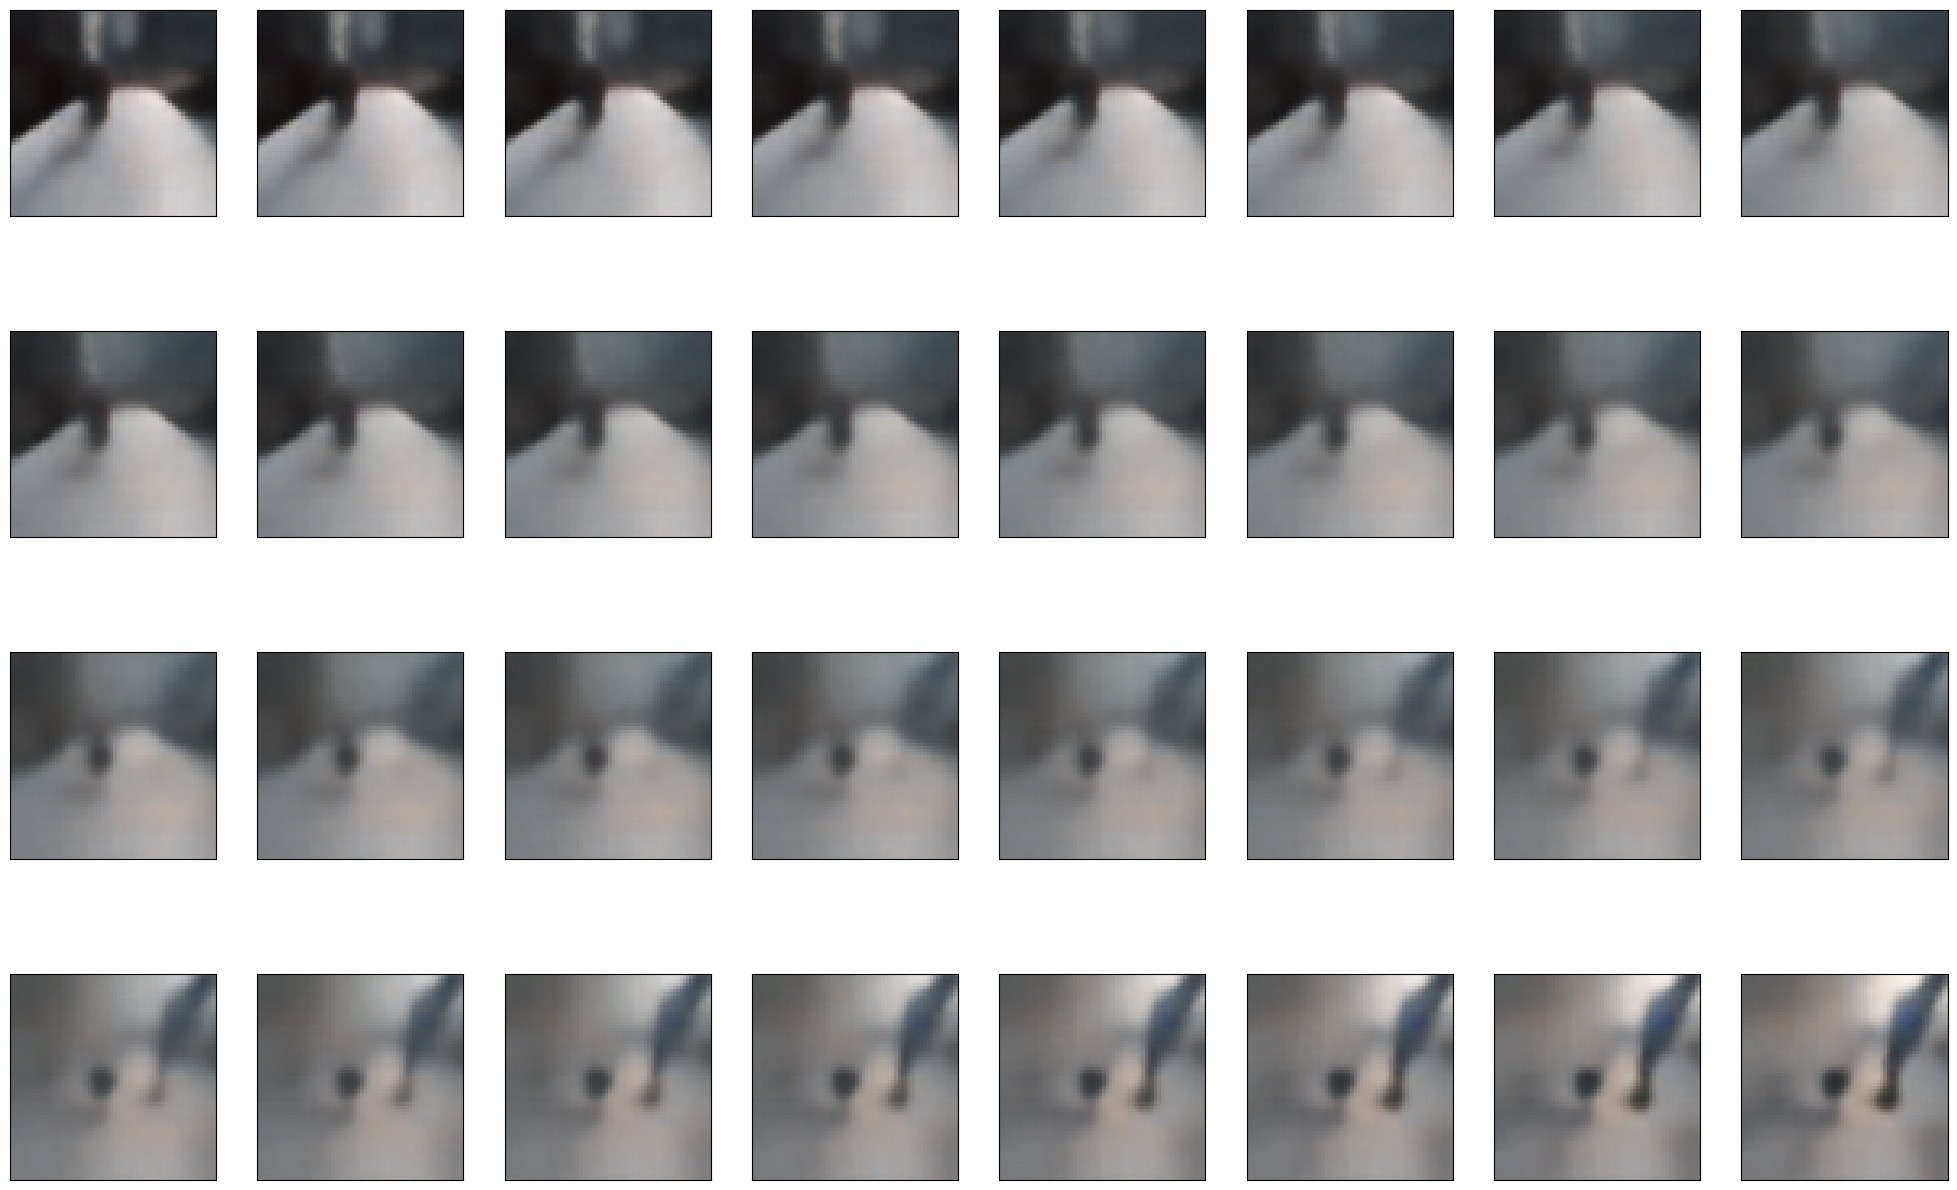

In [19]:
first_dog_idx = 3
second_dog_idx = 8

dz = (mu[second_dog_idx] - mu[first_dog_idx]) / 31
walk = Variable(torch.randn(32, latent_dim, 4, 4)).to(DEVICE)
walk[0] = mu[first_dog_idx]

for i in range(1, 32):
    walk[i] = walk[i-1] + dz
walk = model.decoder(walk).detach().cpu().numpy().transpose(0, 2, 3, 1)

fig = plt.figure(figsize=(25, 16))
for ii, img in enumerate(walk):
    ax = fig.add_subplot(4, 8, ii + 1, xticks=[], yticks=[])
    plt.imshow((img))

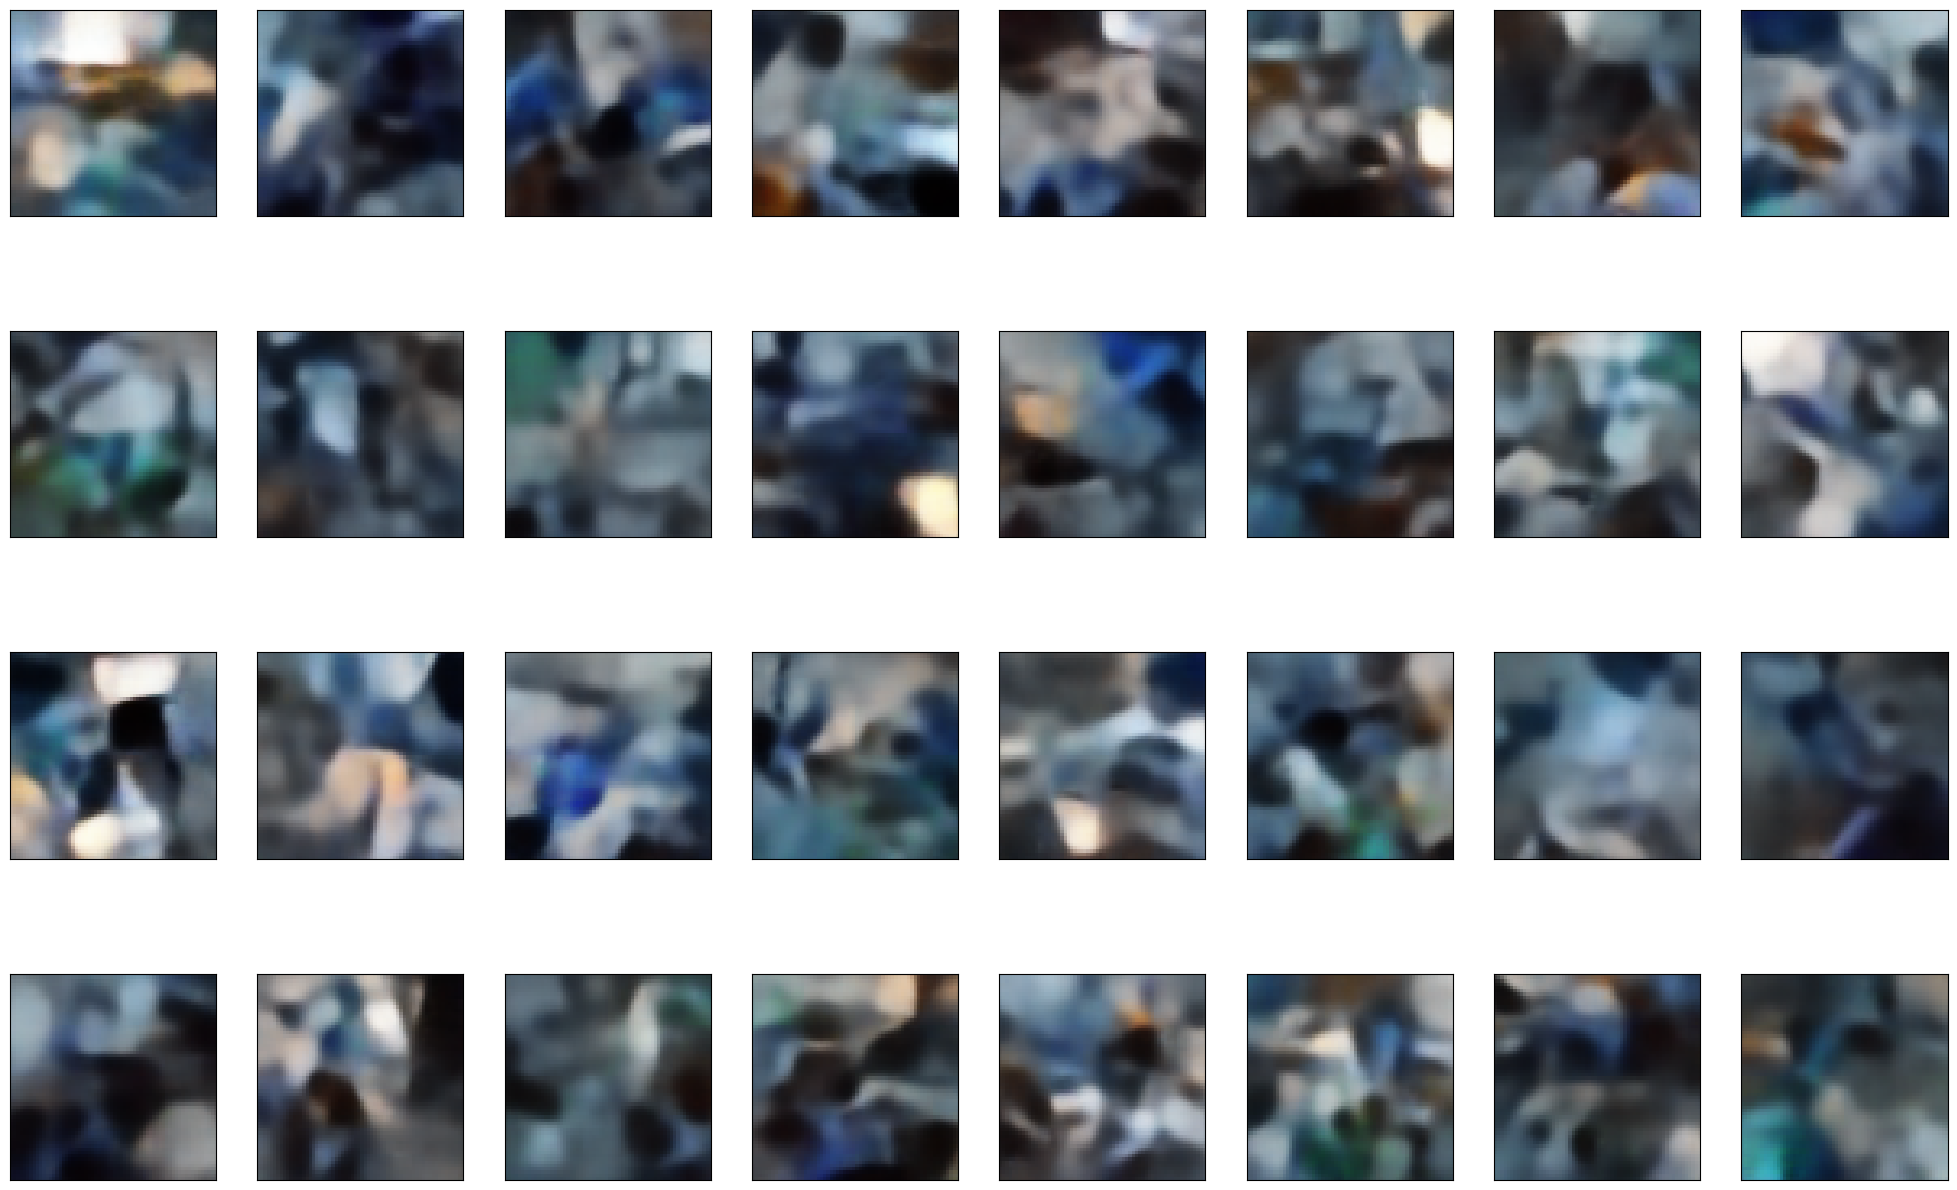

In [20]:
samples = Variable(torch.randn(32, latent_dim, 4, 4)).to(DEVICE)
samples = model.decoder(samples).detach().cpu().numpy().transpose(0, 2, 3, 1)

fig = plt.figure(figsize=(25, 16))
for ii, img in enumerate(samples):
    ax = fig.add_subplot(4, 8, ii + 1, xticks=[], yticks=[])
    plt.imshow((img))

In [ ]:
with torch.no_grad():
    